# Contextualização do Problema

Tibia, lançado em 1998, é um dos primeiros MMORPGs que, mesmo após várias atualizações, mantém sua relevância como um dos maiores do gênero até hoje. As constantes melhorias no jogo introduziram uma diversidade de criaturas e locais de caça, cada uma apresentando estatísticas únicas como a vida máxima, fraquezas ou fortalezas á elementos, quantidade de golpes distintos, dano de cada golpe, dano por turno (DPS), além de outras estatísticas calculadas previamente (dado as características do meu personagem) como quantidade de turnos de dano que a criatura deve receber para morrer.

Existem diversas maneiras de aumentar o dano causado pelo personagem, sendo que neste estudo focaremos em duas: as runas elementais (físico, veneno, fogo, morte, sagrado, gelo) e as runas refletoras de dano. As runas podem ser alocada apenas em 1 criatura por runa, e cada criatura, por sua vez pode ter alocada apenas 1 runa. 


As runas elementais concedem dano baseado na vida máxima da criatura e a sua chance de ativação é proporcional á quantidade de turnos de dano que ela recebe antes de morrer. Por outro lado a runa refletora de dano concede dano baseado no dano recebido pelo personagem, sua chance de ativação é proporcional á quantidade de turnos de dano que a criatura desfere antes de morrer.

Os locais de caça apresentam uma diversidade de criaturas, e a proporção de sua aparição varia também de acordo com o caminho escolhido pelo jogador para explorar e enfrentá-las repetidamente, buscando pontos de experiência.

O objetivo deste trabalho é responder à seguinte pergunta: dadas as restrições de alocação de runas, as características do local de caça (proporção de aparição de criaturas) e as estatísticas das criaturas, como vida máxima, dano aumentado ou reduzido á elementos, quantidade de golpes deferidos pela criatura, dano dos golpes e quantidade de golpes para derrotar cada criatura, **COMO DEVEMOS ALOCAR AS RUNAS E EM QUAIS CRIATURAS ALOCÁ-LAS PARA MAXIMIZAR O DANO ADICIONAL E EXTRAIR O MÁXIMO QUE UM LOCAL DE CAÇA, COMO O DOS ELFOS DE FOGO EM FEYRIST, PODE OFERECER?**

# 1 Import Bibliotecas

In [1]:
#!pip install pulp

In [2]:
from pulp import *
from statistics import median
import pandas as pd

# 2 Dados coletados

## 2.1 Lista de dados coletados

**vida:** Vida maxima da criatura  
**dano_fisico:** Fator de multiplicação de dano físico que a criatura recebe  
**dano_poison:** Fator de multiplicação de dano de veneno que a criatura recebe  
**dano_fire:** Fator de multiplicação de dano de fogo que a criatura recebe  
**dano_death:** Fator de multiplicação de dano de morte que a criatura recebe  
**dano_energy:** Fator de multiplicação de dano de energia que a criatura recebe  
**dano_holy:** Fator de multiplicação de dano sagrado que a criatura recebe  
**dano_ice:** Fator de multiplicação de dano de gelo que a criatura recebe  
**qtd_golpes_distintos:** Quantidade de golpes distintos que a criatura pode deferir em 1 turno  
**dano_medio_golpe:** Dano médio dos golpes distintos que a criatura pode deferir em 1 turno  
**proporcao_respawn:** Proporção de aparição dado o caminho escolhido para repetir no local de caça.  
**turnos_dano_para_morte**: Média do número de turnos de dano a criatura recebe antes de morrer dado as estatisticas do meu personagem (Armas, set, rotação de magia, talentos, skills, encantamentos (imbuements), chance de dano crítico etc)  

In [3]:
dicionario_criaturas = {'Arachnophobica':{'vida':5000,
                                          'dano_fisico':1,
                                          'dano_poison':1,
                                          'dano_fire':1,
                                          'dano_death':0.5,
                                          'dano_energy':0.5,
                                          'dano_holy':1.4,
                                          'dano_ice':1,
                                          'qtd_golpes_distintos':7,
                                          'dano_medio_golpe':230.71,
                                          'proporcao_respawn':0.03880,
                                          'turnos_dano_para_morte':6},
                        'Crazed_Summer_Vanguard':{'vida':5500,
                                          'dano_fisico':1,
                                          'dano_poison':1,
                                          'dano_fire':0.5,
                                          'dano_death':1,
                                          'dano_energy':1,
                                          'dano_holy':0.8,
                                          'dano_ice':1.3,
                                          'qtd_golpes_distintos':5,
                                          'dano_medio_golpe':243,
                                          'proporcao_respawn':0.3691,
                                          'turnos_dano_para_morte':7},
                        'Crazed_Summer_Rearguard':{'vida':5300,
                                          'dano_fisico':1,
                                          'dano_poison':1,
                                          'dano_fire':0.5,
                                          'dano_death':1,
                                          'dano_energy':1,
                                          'dano_holy':0.8,
                                          'dano_ice':1.3,
                                          'qtd_golpes_distintos':3,
                                          'dano_medio_golpe':253.333,
                                          'proporcao_respawn':0.3433,
                                          'turnos_dano_para_morte':7},
                        'Insane_Siren':{'vida':6500,
                                          'dano_fisico':1.1,
                                          'dano_poison':1,
                                          'dano_fire':0.45,
                                          'dano_death':1,
                                          'dano_energy':1,
                                          'dano_holy':0.75,
                                          'dano_ice':1.2,
                                          'qtd_golpes_distintos':7,
                                          'dano_medio_golpe':196.43,
                                          'proporcao_respawn':0.1888,
                                          'turnos_dano_para_morte':7},
                        'Lacewing_Moth':{'vida':900,
                                          'dano_fisico':1,
                                          'dano_poison':1,
                                          'dano_fire':1,
                                          'dano_death':1,
                                          'dano_energy':1,
                                          'dano_holy':1,
                                          'dano_ice':1,
                                          'qtd_golpes_distintos':2,
                                          'dano_medio_golpe':40,
                                          'proporcao_respawn':0.0300,
                                          'turnos_dano_para_morte':2},
                        'Thanatursus':{'vida':7200,
                                          'dano_fisico':0.7,
                                          'dano_poison':1,
                                          'dano_fire':1,
                                          'dano_death':1.2,
                                          'dano_energy':0.5,
                                          'dano_holy':0.8,
                                          'dano_ice':1,
                                          'qtd_golpes_distintos':5,
                                          'dano_medio_golpe':250,
                                          'proporcao_respawn':0.0300,
                                          'turnos_dano_para_morte':10}
                       }

## 2.2 Detalhes de coleta

- **proporcao_respawn:** Foi previamente calculado baseado no caminho repetido para caçar os montros
- **turnos_dano_para_morte:** Foi previamente calculado baseado nas estatísticas do meu personagem, considerando a arma utilizada, o elemento da arma utilizada já descontado a fraqueza/fortaleza das criaturas ao determinado elemento, rotação de magias (exori gran, exori e exori mas), talentos (roda de habilidades, redução de cooldown exori mas, dano aumentado no exori gran), skills ( skills do personagem + loyal points + skills provenientes de consumíveis rings, amuletos e equipamentos), encantamentos (imbuements) e chance de dano crítico.
- **danos:** Retirado do website do tibiawiki (https://www.tibiawiki.com.br/)
- **qtd_golpes_distintos:** Retirado do website do tibiawiki (https://www.tibiawiki.com.br/)
- **dano_medio_golpe:** Retirado do website do tibiawiki (https://www.tibiawiki.com.br/)


# 3 Runas

- As runas de dano elemental podem deferir com 10% de chance um dano correspondente á 5% da vida máxima da criatura a cada golpe aplicado 
- A runa de reflecção de dano pode refletir com 10% de chance um dano correspondente ao dano recebido pela criatura

In [4]:
chance_ativacao_runa = 0.1
dano_runa_elemental = 0.05

In [5]:
runas_dano_elemental =['dano_fisico','dano_poison','dano_fire','dano_death','dano_energy','dano_holy','dano_ice']
runas_dano_refletido = ['reflect']
runas_totais = runas_dano_elemental + runas_dano_refletido
runas_totais

['dano_fisico',
 'dano_poison',
 'dano_fire',
 'dano_death',
 'dano_energy',
 'dano_holy',
 'dano_ice',
 'reflect']

# 3.1 Variáveis do problema de pesquisa operacional

- Ao todo são 6 criaturas e 8 runas.
- O jogo restringe a alocação de apenas 1 runa por criatura
- Além disso, há restrição de cada criatura ter alocada apenas 1 runa

Portanto, criaremos 6*8 = 48 variáveis binárias para indicar se o conjunto [runa,criatura] será habilitada (1) ou não (0).

In [6]:
variaveis_runa_elemental_criatura = []
for criatura in dicionario_criaturas.keys():
    for runa in runas_dano_elemental:
        variaveis_runa_elemental_criatura.append(runa + '_' + criatura)        
variaveis_runa_elemental_criatura

['dano_fisico_Arachnophobica',
 'dano_poison_Arachnophobica',
 'dano_fire_Arachnophobica',
 'dano_death_Arachnophobica',
 'dano_energy_Arachnophobica',
 'dano_holy_Arachnophobica',
 'dano_ice_Arachnophobica',
 'dano_fisico_Crazed_Summer_Vanguard',
 'dano_poison_Crazed_Summer_Vanguard',
 'dano_fire_Crazed_Summer_Vanguard',
 'dano_death_Crazed_Summer_Vanguard',
 'dano_energy_Crazed_Summer_Vanguard',
 'dano_holy_Crazed_Summer_Vanguard',
 'dano_ice_Crazed_Summer_Vanguard',
 'dano_fisico_Crazed_Summer_Rearguard',
 'dano_poison_Crazed_Summer_Rearguard',
 'dano_fire_Crazed_Summer_Rearguard',
 'dano_death_Crazed_Summer_Rearguard',
 'dano_energy_Crazed_Summer_Rearguard',
 'dano_holy_Crazed_Summer_Rearguard',
 'dano_ice_Crazed_Summer_Rearguard',
 'dano_fisico_Insane_Siren',
 'dano_poison_Insane_Siren',
 'dano_fire_Insane_Siren',
 'dano_death_Insane_Siren',
 'dano_energy_Insane_Siren',
 'dano_holy_Insane_Siren',
 'dano_ice_Insane_Siren',
 'dano_fisico_Lacewing_Moth',
 'dano_poison_Lacewing_Moth',

In [7]:
variaveis_runa_dano_refletido_criatura = []
for criatura in dicionario_criaturas.keys():
    for runa in runas_dano_refletido:
        variaveis_runa_dano_refletido_criatura.append(runa + '_' + criatura)
variaveis_runa_dano_refletido_criatura

['reflect_Arachnophobica',
 'reflect_Crazed_Summer_Vanguard',
 'reflect_Crazed_Summer_Rearguard',
 'reflect_Insane_Siren',
 'reflect_Lacewing_Moth',
 'reflect_Thanatursus']

# 4 Pesquisa Operacional

## 4.1 Criando variáveis de runas por dano elemental na vida máxima

In [8]:
var = LpVariable.dict('Runa',(variaveis_runa_elemental_criatura), cat='Binary' ,lowBound=0)

## 4.2 Criando variável de runa de reflect dano da criatura

In [9]:
var2 = LpVariable.dict('Runa',(variaveis_runa_dano_refletido_criatura), cat='Binary' ,lowBound=0)

In [10]:
#print(var)
#print(var2)

## 4.3 Modelo

- Optaremos pelo modelo de maximização de DPS (dano por segundo por criatura)

In [11]:
model = LpProblem('DPS',LpMaximize)

## 4.4 Função objetivo
- Maximização de DPS

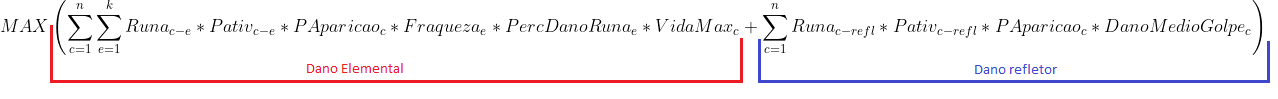

In [12]:
from IPython import display
display.Image("funcao_objetivo.png")

onde:  
  
**c** = criatura  
**e** = elemento  
**Runa_ce** = Variável binária para indicar se a runa do elemento E está ativa para a criatura C  
**P_ativ** = Chance de ativação da runa que corresponde á 10% para todos elementos   
**DanoRuna** = Dano aplicado pela runa que corresponde áe 5% da vida máxima para todos elementos  
**PResp_c** = Proporção que a criatura C aparece  
**Turno_c** = Turnos de dano que a criatura C deve receber para morrer  
**FatorDano_ce** = Fator de dano que a criatura C recebe do elemento E  
**VidaMax_c** = Vida máxima da criatura C  
**Runa_creflect** = Variável binária para indicar se a runa de reflect está ativa para a criatura C  
**Golpes_c** = Números de golpes distintos que a criatura C pode deferir  
**DanoMedioGolpe_c** = Dano médio dos golpes distintos que a criatura C pode deferir  

Nesse estudo de caso n=6 criaturas e k= 7 elementos

### 4.41 Probabilidades de ativação: Dano da runa Elemental

In [13]:
import math  

- Se for necessário 1 golpe para derrotar a criatura a probabilidade de ativar é de de 10%.
- A runa elemental proca apenas 1x por criatura, então o maximo que teremos será 1 sucesso por criatura!


A probabilidade segue uma distribuição binomial: calculando os x sucessos em n tentativas temos:


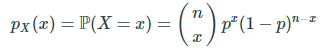

In [14]:
display.Image("p(x).png")

dado que:

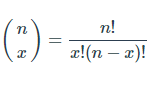

In [15]:
display.Image("nx.png")

In [16]:
def prob_ativacao(chance_ativacao_runa,n,x):
    prob = math.factorial(n) / (math.factorial(x) * math.factorial(n-x)) * (chance_ativacao_runa**x) * ((1-chance_ativacao_runa)**(n-x))
    return prob

In [17]:
## 1 sucesso em 1 golpe (tentativa): 10%
prob_ativacao(chance_ativacao_runa,1,1)

0.1

In [18]:
## 1 sucesso em 2 golpes (tentativa): 18%
prob_ativacao(chance_ativacao_runa,2,1)

0.18000000000000002

### 4.42 Probabilidade de ativação: Dano da runa refletora

- A cada golpe recebido da criatura há uma probabilidade de 10% de procar a runa refletora.
- A quantidade de golpes que uma criatura defere por turno varia em uma distribuição uniforme;
- A runa refletora pode procrar multiplas vezes por criatura

- A quantidade de golpes que a criatura pode dar em um turno se distribui uniformemente, na teoria. Na prática observamos que a a frequencia que a criatura defere 1 golpe só é maior do que a frequencia que ela defere n golpes com n>1.

- Para fins de simplificação do modelo os golpes que a criatura defere será estimada como 0,4*golpes distintos que ela pode deferir em um turno, mas o ideal seria mensurar essa variável.

Se a criatura defere 4 golpes teremos 4 chances de procar a runa a seguinte distribuição:

In [19]:
## 0 sucesso em 4 golpes (tentativas): 0,36%
prob_ativacao(chance_ativacao_runa,4,0)

0.6561

In [20]:
## 1 sucesso em 4 golpes (tentativas): 0,36%
prob_ativacao(chance_ativacao_runa,4,1)

0.2916

In [21]:
## 2 sucessos em 4 golpes (tentativas): 0,36%
prob_ativacao(chance_ativacao_runa,4,2)

0.04860000000000001

In [22]:
## 3 sucesso em 4 golpes (tentativas): 0,36%
prob_ativacao(chance_ativacao_runa,4,3)

0.0036000000000000008

In [23]:
## 4 sucesso em 4 golpes (tentativas): 0,01%
prob_ativacao(chance_ativacao_runa,4,4)

0.00010000000000000002

em vez de assumir que a runa refletora irá procar uma vez (p=1) e usar a probabilidade de p(x=1), vamos realizar uma media ponderada dos sucessos pelas suas probabilidades, nesse exemplo sabemos que há 35% de chance da runa procar (1,2,3 ou 4 vezes)

Encontraremos o numero de reflexões médio da seguinte forma:
  
  
- Desses 35% de chance de sucesso temos:  
  
  
- Há 84,8% de chance de ter apenas 1 reflexão bem sucedida  
- 14,1% de chance de ter 2 reflexão bem sucedida  
- 1,05% de chance de ter apenas 3 reflexão bem sucedida  
- e 0,029% de chance de ter apenas 4 reflexão bem sucedida  
- Totalizando 1,16 reflexões se fizermos uma média ponderada

- Conclusão a runa refletora para uma criatura que defere 4 golpes por turno pode ativar com probabilidade de 35% e reflete o dano de 1,16 golpes

In [24]:
def prob_runa_refletora(chance_ativacao_runa,tentativa):
    
    fator = 0
    
    for sucesso in range(1,tentativa+1):
        if sucesso <= tentativa:
            prob = prob_ativacao(chance_ativacao_runa,tentativa,sucesso)
            fator =  fator + prob*sucesso
            
    prob_sucesso = 1-prob_ativacao(chance_ativacao_runa,tentativa,0) ### 1-prob(nao_sucesso)
    #qtd_golpes_refletidos =  fator / prob_sucesso
    
    return prob_sucesso

In [25]:
prob_runa_refletora(chance_ativacao_runa,4)

0.3439

In [26]:
def qtd_golpes_refletidos(chance_ativacao_runa,tentativa):
    fator = 0
    
    for sucesso in range(1,tentativa+1):
        if sucesso <= tentativa:
            prob = prob_ativacao(chance_ativacao_runa,tentativa,sucesso)
            fator =  fator + prob*sucesso
            
    prob_sucesso = 1-prob_ativacao(chance_ativacao_runa,tentativa,0) ### 1-prob(nao_sucesso)
    qtd_golpes_refletidos =  fator / prob_sucesso
    
    return qtd_golpes_refletidos

In [27]:
qtd_golpes_refletidos(chance_ativacao_runa,4)

1.1631288165164293

### 4. 43 Modelando função objetivo

In [28]:
lista_equacoes = []

## Percorre as criaturas
for criatura in dicionario_criaturas.keys():
    
    ## Percorre todas runas elementais
    for runa_elemental_criatura in variaveis_runa_elemental_criatura:
                
        ## Checa se runa_criatura corresponde a criatura do loop
        if criatura in runa_elemental_criatura:
            
            ### Checa o elemento da runa:
            index_dicionario_fator_fraqueza = runa_elemental_criatura.find('_',5)
            dicionario_fraqueza_elemental = runa_elemental_criatura[:index_dicionario_fator_fraqueza]

            ## Adiciona equação de dps por elemento por criatura
            lista_equacoes.append(var[runa_elemental_criatura] * 
                                  prob_ativacao(chance_ativacao_runa,dicionario_criaturas[criatura]['turnos_dano_para_morte'],1) * ### Probabilidade 1 sucesso em n tentativas
                                  dicionario_criaturas[criatura]['proporcao_respawn'] *
                                  dicionario_criaturas[criatura][dicionario_fraqueza_elemental] *
                                  dano_runa_elemental * 
                                  dicionario_criaturas[criatura]['vida']
                                  )
        
        
    ## Percorre todas runas refletoras:
    for runa_refletora_criatura in variaveis_runa_dano_refletido_criatura:
        
        ## Checa se runa_criatura corresponde a criatura do loop
        if criatura in runa_refletora_criatura:
        
            ## Adiciona equação de dps dano refletido por criatura
            lista_equacoes.append(var2[runa_refletora_criatura] * 
                                  prob_runa_refletora(chance_ativacao_runa,dicionario_criaturas[criatura]['qtd_golpes_distintos']) * ### Probabilidade sucesso
                                  qtd_golpes_refletidos(chance_ativacao_runa,dicionario_criaturas[criatura]['qtd_golpes_distintos']) * ## estimativa de qtd de golpes refletidos
                                  dicionario_criaturas[criatura]['proporcao_respawn'] *
                                  dicionario_criaturas[criatura]['dano_medio_golpe'] )
            
            
model += lpSum(lista_equacoes)

## 4.5 Restrições do modelo

1) Cada runa pode estar alocada no máximo uma vez 

- Cada runa deve ter, no máximo, 1 criatura alocada (1 unico valor = 1)

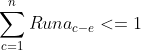

In [29]:
display.Image("eq_restricao1.png")

- Valido para todos elementos, fixando uma elemento, se somar todas as variáveis runas por criatura tem que ser <= 1

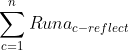

In [30]:
display.Image("eq_restricao1.1.png")

- Fixando uma elemento, se somar todas as variáveis runas por criatura tem que ser <= 1

In [31]:
runas_totais

['dano_fisico',
 'dano_poison',
 'dano_fire',
 'dano_death',
 'dano_energy',
 'dano_holy',
 'dano_ice',
 'reflect']

In [32]:
runas_reflects_todas_criaturas = []

for runa in runas_totais:
    runas_elementais_todas_criaturas = []
    runas_reflects_todas_criaturas = []
    
    runas_elementais_todas_criaturas = [i for i in list(var.keys()) if runa in i]
    runas_reflects_todas_criaturas = [i for i in list(var2.keys()) if runa in i]
    
    ## capturando as variaveis e nao os nomes das variaveis
    x_elem_values = []
    for r1 in runas_elementais_todas_criaturas:
        for x in var.values():
            if r1 in str(x):
                x_elem_values.append(x)

    ## capturando as variaveis e nao os nomes das variaveis           
    x_reflect_values = []
    for r1 in runas_reflects_todas_criaturas:
        for x in var2.values():
            if r1 in str(x):
                x_reflect_values.append(x)
    
    
    if len(runas_elementais_todas_criaturas)>0:
        model += lpSum(x_elem_values) <=1
    else:
        model += lpSum(x_reflect_values) <=1

2) Cada criatura deve ter, no máximo, 1 runa alocada.

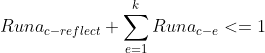

In [33]:
display.Image("eq_restricao2.png")

- Valido para todas criaturas, fixando um elemento, se somar todas as variáveis runas tem que ser <= 1

In [34]:
for criatura in dicionario_criaturas.keys():
    runas_elementais_da_criatura = [i + '_' + criatura for i in runas_dano_elemental]
    runas_reflect_da_criatura = [i + '_' + criatura for i in runas_dano_refletido]
    runas_possiveis_da_criatura = runas_elementais_da_criatura + runas_reflect_da_criatura
    
    ## capturando as variaveis e nao os nomes das variaveis (elemental)
    x_values = []
    for r1 in runas_elementais_da_criatura:
        for x in var.values():
            if r1 in str(x):
                x_values.append(x)

    ## Nao vamos resetar a lista x_values!!
    ## capturando as variaveis e nao os nomes das variaveis (reflect)
    for r1 in runas_reflect_da_criatura:
        for x in var2.values():
            if r1 in str(x):
                x_values.append(x)
    
    model += lpSum(x_values) <=1 

## 4.6 Visualizando o modelo completo

In [35]:
print(model)

DPS:
MAXIMIZE
1.7183259000000006*Runa_dano_death_Arachnophobica + 33.84330547815001*Runa_dano_death_Crazed_Summer_Rearguard + 37.75981307175001*Runa_dano_death_Crazed_Summer_Vanguard + 22.826453832000006*Runa_dano_death_Insane_Siren + 0.243*Runa_dano_death_Lacewing_Moth + 5.020969537440001*Runa_dano_death_Thanatursus + 1.7183259000000006*Runa_dano_energy_Arachnophobica + 33.84330547815001*Runa_dano_energy_Crazed_Summer_Rearguard + 37.75981307175001*Runa_dano_energy_Crazed_Summer_Vanguard + 22.826453832000006*Runa_dano_energy_Insane_Siren + 0.243*Runa_dano_energy_Lacewing_Moth + 2.0920706406000003*Runa_dano_energy_Thanatursus + 3.4366518000000013*Runa_dano_fire_Arachnophobica + 16.921652739075004*Runa_dano_fire_Crazed_Summer_Rearguard + 18.879906535875005*Runa_dano_fire_Crazed_Summer_Vanguard + 10.271904224400002*Runa_dano_fire_Insane_Siren + 0.243*Runa_dano_fire_Lacewing_Moth + 4.1841412812000005*Runa_dano_fire_Thanatursus + 3.4366518000000013*Runa_dano_fisico_Arachnophobica + 33.84330

# 5 Resolvendo o modelo

In [36]:
status = model.solve()

## 5.1 Resultados

In [37]:
print(f'A solução é considerada {LpStatus[status]}')
print(f'O maior DPS encontrado foi de {value(model.objective)}')
print("")
print("=======================================================")
print("Para esse DPS as runas devem ser alocadas da seguinte forma:")

print("")
print("Runa de dano Físico:")
runas = [i for i in var.keys() if 'dano_fisico' in i]
for runa in runas:
    if value(var[runa])!=0:
        print(runa,value(var[runa]))
        
print("")
print("Runa de dano Poison:")
runas = [i for i in var.keys() if 'dano_poison' in i]
for runa in runas:
    if value(var[runa])!=0:
        print(runa,value(var[runa]))
        
print("")
print("Runa de dano Fire:")
runas = [i for i in var.keys() if 'dano_fire' in i]
for runa in runas:
    if value(var[runa])!=0:
        print(runa,value(var[runa]))
        
print("")
print("Runa de dano Death:")
runas = [i for i in var.keys() if 'dano_death' in i]
for runa in runas:
    if value(var[runa])!=0:
        print(runa,value(var[runa]))
        
print("")
print("Runa de dano Energy:")
runas = [i for i in var.keys() if 'dano_energy' in i]
for runa in runas:
    if value(var[runa])!=0:
        print(runa,value(var[runa]))
        
print("")
print("Runa de dano Holy:")
runas = [i for i in var.keys() if 'dano_holy' in i]
for runa in runas:
    if value(var[runa])!=0:
        print(runa,value(var[runa]))
        
print("")
print("Runa de dano Ice:")
runas = [i for i in var.keys() if 'dano_ice' in i]
for runa in runas:
    if value(var[runa])!=0:
        print(runa,value(var[runa]))
        
print("")
print("Runa de reflect de dano:")
runas = [i for i in var2.keys() if 'reflect' in i]
for runa in runas:
    if value(var2[runa])!=0:
        print(runa,value(var2[runa]))

A solução é considerada Optimal
O maior DPS encontrado foi de 124.02632839423501

Para esse DPS as runas devem ser alocadas da seguinte forma:

Runa de dano Físico:
dano_fisico_Insane_Siren 1.0

Runa de dano Poison:
dano_poison_Lacewing_Moth 1.0

Runa de dano Fire:

Runa de dano Death:
dano_death_Thanatursus 1.0

Runa de dano Energy:

Runa de dano Holy:
dano_holy_Arachnophobica 1.0

Runa de dano Ice:
dano_ice_Crazed_Summer_Rearguard 1.0

Runa de reflect de dano:
reflect_Crazed_Summer_Vanguard 1.0


# 6 Avaliação dos resultados

- Dano Físico: Insane_Siren
- Dano Poison: Lacewing_Moth
- Dano Fire: -
- Dano Death: Thanatursus
- Dano Energy: -
- Dano Holy: Arachnophobica
- Dano Ice: Crazed_Summer_Rearguard
- Dano Refletor: Crazed_Summer_Vanguard

In [38]:
import pandas as pd
import numpy as np

df_resultados = pd.DataFrame()

for criatura in dicionario_criaturas.keys():
   
    DPS_fisico = (prob_ativacao(chance_ativacao_runa,dicionario_criaturas[criatura]['turnos_dano_para_morte'],1) * ### Probabilidade 1 sucesso em n tentativas
    dicionario_criaturas[criatura]['proporcao_respawn'] *  dicionario_criaturas[criatura]['dano_fisico'] * dano_runa_elemental *  dicionario_criaturas[criatura]['vida'])
    
    DPS_poison = (prob_ativacao(chance_ativacao_runa,dicionario_criaturas[criatura]['turnos_dano_para_morte'],1) * ### Probabilidade 1 sucesso em n tentativas
    dicionario_criaturas[criatura]['proporcao_respawn'] * dicionario_criaturas[criatura]['dano_poison'] *dano_runa_elemental * dicionario_criaturas[criatura]['vida'])
                    
    DPS_fire = (prob_ativacao(chance_ativacao_runa,dicionario_criaturas[criatura]['turnos_dano_para_morte'],1) * ### Probabilidade 1 sucesso em n tentativas
    dicionario_criaturas[criatura]['proporcao_respawn'] * dicionario_criaturas[criatura]['dano_fire'] *dano_runa_elemental * dicionario_criaturas[criatura]['vida'])
    
    DPS_death = (prob_ativacao(chance_ativacao_runa,dicionario_criaturas[criatura]['turnos_dano_para_morte'],1) * ### Probabilidade 1 sucesso em n tentativas
    dicionario_criaturas[criatura]['proporcao_respawn'] * dicionario_criaturas[criatura]['dano_death'] *dano_runa_elemental *  dicionario_criaturas[criatura]['vida'])
    
    DPS_energy = (prob_ativacao(chance_ativacao_runa,dicionario_criaturas[criatura]['turnos_dano_para_morte'],1) * ### Probabilidade 1 sucesso em n tentativas
    dicionario_criaturas[criatura]['proporcao_respawn'] * dicionario_criaturas[criatura]['dano_energy'] *dano_runa_elemental * dicionario_criaturas[criatura]['vida'])
    
    DPS_holy = (prob_ativacao(chance_ativacao_runa,dicionario_criaturas[criatura]['turnos_dano_para_morte'],1) * ### Probabilidade 1 sucesso em n tentativas
    dicionario_criaturas[criatura]['proporcao_respawn'] * dicionario_criaturas[criatura]['dano_holy'] *dano_runa_elemental * dicionario_criaturas[criatura]['vida'])
    
    DPS_ice = (prob_ativacao(chance_ativacao_runa,dicionario_criaturas[criatura]['turnos_dano_para_morte'],1) * ### Probabilidade 1 sucesso em n tentativas
    dicionario_criaturas[criatura]['proporcao_respawn'] * dicionario_criaturas[criatura]['dano_ice'] *dano_runa_elemental * dicionario_criaturas[criatura]['vida'])
    
    DPS_reflect =  (prob_runa_refletora(chance_ativacao_runa,dicionario_criaturas[criatura]['qtd_golpes_distintos']) * ### Probabilidade sucesso
    qtd_golpes_refletidos(chance_ativacao_runa,dicionario_criaturas[criatura]['qtd_golpes_distintos']) * ### Qtde de golpes refletidos com sucesso
    dicionario_criaturas[criatura]['proporcao_respawn'] * dicionario_criaturas[criatura]['dano_medio_golpe'])
    
    df_resultados_iteracao = pd.DataFrame(np.array([[criatura, DPS_fisico,DPS_poison,DPS_fire,DPS_death,DPS_energy,DPS_holy,DPS_ice,DPS_reflect]]), columns=['criatura','fisico','poison','fire','death','energy','holy','ice','reflect'])  
    df_resultados = pd.concat([df_resultados,df_resultados_iteracao])


In [39]:
for col in df_resultados.columns[1:]:
    df_resultados[col] = df_resultados[col].apply(lambda x: round(float(x),3))
df_resultados

,criatura,fisico,poison,fire,death,energy,holy,ice,reflect
0,Arachnophobica,3.437,3.437,3.437,1.718,1.718,4.811,3.437,6.266
0,Crazed_Summer_Vanguard,37.760,37.760,18.880,37.760,37.760,30.208,49.088,44.846
0,Crazed_Summer_Rearguard,33.843,33.843,16.922,33.843,33.843,27.075,43.996,26.091
0,Insane_Siren,25.109,22.826,10.272,22.826,22.826,17.120,27.392,25.960
0,Lacewing_Moth,0.243,0.243,0.243,0.243,0.243,0.243,0.243,0.240
0,Thanatursus,2.929,4.184,4.184,5.021,2.092,3.347,4.184,3.750


- Dano Físico: Insane_Siren
- Dano Poison: Lacewing_Moth
- Dano Fire: -
- Dano Death: Thanatursus
- Dano Energy: -
- Dano Holy: Arachnophobica
- Dano Ice: Crazed_Summer_Rearguard
- Dano Refletor: Crazed_Summer_Vanguard

In [40]:
df_resultados[df_resultados['criatura']=='Insane_Siren']['fisico'].values[0]+\
df_resultados[df_resultados['criatura']=='Lacewing_Moth']['poison'].values[0]+\
df_resultados[df_resultados['criatura']=='Thanatursus']['death'].values[0]+\
df_resultados[df_resultados['criatura']=='Arachnophobica']['holy'].values[0]+\
df_resultados[df_resultados['criatura']=='Crazed_Summer_Rearguard']['ice'].values[0]+\
df_resultados[df_resultados['criatura']=='Crazed_Summer_Vanguard']['reflect'].values[0]

124.02600000000001

In [42]:
25.109+0.243+5.021+4.811+43.996+44.846

124.02600000000001

In [41]:
value(model.objective)

124.02632839423501

- Não há qualquer outra combinação de runas que supere o DPS adicional de 121.90 de dano por criatura.  Vamos checar se essa afirmação é realmente correta utilizando a força bruta.

# 7 Validação dos resultados - por meio da força bruta

In [42]:
lista_de_listas = []
for criatura in df_resultados.criatura.unique():
    lista_danos = df_resultados[df_resultados['criatura']==criatura].values[0][1:].tolist()
    lista_de_listas.append(lista_danos)

In [43]:
df_resultados

,criatura,fisico,poison,fire,death,energy,holy,ice,reflect
0,Arachnophobica,3.437,3.437,3.437,1.718,1.718,4.811,3.437,6.266
0,Crazed_Summer_Vanguard,37.760,37.760,18.880,37.760,37.760,30.208,49.088,44.846
0,Crazed_Summer_Rearguard,33.843,33.843,16.922,33.843,33.843,27.075,43.996,26.091
0,Insane_Siren,25.109,22.826,10.272,22.826,22.826,17.120,27.392,25.960
0,Lacewing_Moth,0.243,0.243,0.243,0.243,0.243,0.243,0.243,0.240
0,Thanatursus,2.929,4.184,4.184,5.021,2.092,3.347,4.184,3.750


In [44]:
lista_de_listas

[[3.437, 3.437, 3.437, 1.718, 1.718, 4.811, 3.437, 6.266],
 [37.76, 37.76, 18.88, 37.76, 37.76, 30.208, 49.088, 44.846],
 [33.843, 33.843, 16.922, 33.843, 33.843, 27.075, 43.996, 26.091],
 [25.109, 22.826, 10.272, 22.826, 22.826, 17.12, 27.392, 25.96],
 [0.243, 0.243, 0.243, 0.243, 0.243, 0.243, 0.243, 0.24],
 [2.929, 4.184, 4.184, 5.021, 2.092, 3.347, 4.184, 3.75]]

In [45]:
lista_indexes = [0,1,2,3,4,5,6,7]
DPS_max = 0
n_iteracao=0

## Loop criatura 1
for index_elemento1 in lista_indexes:
    elemento1 = lista_de_listas[0][index_elemento1]
    nova_lista_indexes = [i for i in lista_indexes if i!=index_elemento1]

    ## Loop criatura 2
    for index_elemento2 in nova_lista_indexes:
        elemento2 = lista_de_listas[1][index_elemento2]
        nova_lista_indexes = [i for i in lista_indexes if i not in [index_elemento1,index_elemento2]]
        
        ## Loop criatura 3        
        for index_elemento3 in nova_lista_indexes:
            elemento3 = lista_de_listas[2][index_elemento3]
            nova_lista_indexes = [i for i in lista_indexes if i not in [index_elemento1,index_elemento2,index_elemento3]]
            
            ## Loop criatura 4        
            for index_elemento4 in nova_lista_indexes:
                elemento4 = lista_de_listas[3][index_elemento4]
                nova_lista_indexes = [i for i in lista_indexes if i not in [index_elemento1,index_elemento2,index_elemento3,index_elemento4]]

                ## Loop criatura 5      
                for index_elemento5 in nova_lista_indexes:
                    elemento5 = lista_de_listas[4][index_elemento5]
                    nova_lista_indexes = [i for i in lista_indexes if i not in [index_elemento1,index_elemento2,index_elemento3,index_elemento4,index_elemento5]]

                    
                    ## Loop criatura 6     
                    for index_elemento6 in nova_lista_indexes:
                        elemento6 = lista_de_listas[5][index_elemento6]
                        nova_lista_indexes = [i for i in lista_indexes if i not in [index_elemento1,index_elemento2,index_elemento3,index_elemento4,index_elemento5,index_elemento6]]

                        DPS = elemento1+elemento2+elemento3+elemento4+elemento5+elemento6
                        n_iteracao = n_iteracao+1
                        if DPS > DPS_max:
                            print(f'encontrado novo DPS maximo de {DPS}, com elementos {elemento1},{elemento2},{elemento3},{elemento4},{elemento5},{elemento6}')
                            DPS_max = DPS

encontrado novo DPS maximo de 84.53499999999998, com elementos 3.437,37.76,16.922,22.826,0.243,3.347
encontrado novo DPS maximo de 85.37199999999999, com elementos 3.437,37.76,16.922,22.826,0.243,4.184
encontrado novo DPS maximo de 86.20899999999999, com elementos 3.437,37.76,16.922,22.826,0.243,5.021
encontrado novo DPS maximo de 87.84599999999999, com elementos 3.437,37.76,16.922,27.392,0.243,2.092
encontrado novo DPS maximo de 89.10099999999998, com elementos 3.437,37.76,16.922,27.392,0.243,3.347
encontrado novo DPS maximo de 89.50399999999999, com elementos 3.437,37.76,16.922,27.392,0.243,3.75
encontrado novo DPS maximo de 90.77499999999999, com elementos 3.437,37.76,16.922,27.392,0.243,5.021
encontrado novo DPS maximo de 101.45599999999997, com elementos 3.437,37.76,33.843,22.826,0.243,3.347
encontrado novo DPS maximo de 102.29299999999998, com elementos 3.437,37.76,33.843,22.826,0.243,4.184
encontrado novo DPS maximo de 104.76699999999998, com elementos 3.437,37.76,33.843,27.392,

In [46]:
print(n_iteracao)

20160


**Foi encontrado o max dps de 124.026 com a composição de runas identicas a encontradas na solução anterior:**

In [48]:
df_resultados

,criatura,fisico,poison,fire,death,energy,holy,ice,reflect
0,Arachnophobica,3.437,3.437,3.437,1.718,1.718,4.811,3.437,6.266
0,Crazed_Summer_Vanguard,37.760,37.760,18.880,37.760,37.760,30.208,49.088,44.846
0,Crazed_Summer_Rearguard,33.843,33.843,16.922,33.843,33.843,27.075,43.996,26.091
0,Insane_Siren,25.109,22.826,10.272,22.826,22.826,17.120,27.392,25.960
0,Lacewing_Moth,0.243,0.243,0.243,0.243,0.243,0.243,0.243,0.240
0,Thanatursus,2.929,4.184,4.184,5.021,2.092,3.347,4.184,3.750


Arachnophobica: 4.811 -> holy  
Crazed_Summer_Vanguard: 42.721 -> reflect  
Crazed_Summer_Rearguard: 27.413 -> ice  
Insane_Siren: 25.109 -> fisico  
Lacewing_Moth: 0.243 -> poison ou fire  
Thanatursus: 5.021 -> death  

# 8 Comentários

- Ambas as técnicas convergiram para a mesma resposta.
- Observa-se que a runa de dano de Fogo não foi escolhida no algoritmo, possivelmente devido à resistência das criaturas enfrentadas ao fogo no local de caça.